# Trabalho 1 - Simulação de um sistema não linear e suas caracteristicas

## Sistema escolhido
O modelo de Van Der Pol (ou VDP na sequência) é utilizado para modelar sistemas com condutância não linear,
e com característícas dissipativas.

## Classificação do sistema


In [351]:
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['legend.fontsize'] = 10

### Definição das equações de estado

In [352]:
def dvCord(x, ux, uy, t):
    # a = 0.258
    # b = 4.033
    # F = 8
    # G = 1
    epsilon = 8.53

    xd = np.array(np.zeros((3, 1)))

    xd[0] = x[1]
    xd[1] = -x[0] + epsilon * x[1] + ux - epsilon * x[0] ** 2 * x[1]
    # xd[2] = x[0]

    return (xd.copy())


### Definição de Runge-Kutta

In [353]:
def rk_cord(x0, ux, uy, h, t):
    # 1st evaluation
    xd = dvCord(x0, ux, uy, t)
    savex0 = x0.copy()
    phi = xd.copy()
    for i in range(len(x0)):
        x0[i] = savex0[i] + 0.5 * h * xd[i]

    # 2nd evaluation
    xd = dvCord(x0.T, ux, uy, t + 0.5 * h)
    phi = (phi + 2 * xd)
    for i in range(len(x0)):
        x0[i] = savex0[i] + 0.5 * h * xd[i]

    # 3rd evaluation
    xd = dvCord(x0, ux, uy, t + 0.5 * h)
    phi = phi + 2 * xd
    for i in range(len(x0)):
        x0[i] = savex0[i] + h * xd[i]

    # 4th evaluation
    xd = dvCord(x0, ux, uy, t + h)

    result_x = x0.copy()
    for i in range(len(x0)):
        result_x[i] = savex0[i] + (phi[i] + xd[i]) * h / 6

    return result_x


### Plot das funções

In [354]:
def run_rk(t:np.ndarray, x:np.ndarray, u, h):
    result = None
    for k in range(1, len(t)):
        result = rk_cord(x[:, k - 1].copy(), u[k], u[k], h, t[k])
        x[:, k] = result
    
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 4))
    ax.set(xlabel='time')
    ax.set(ylabel='u')
    color = ['red', 'green', 'blue', 'yellow', 'orange']
    ax.plot(t, u, color=color[random.randint(0, len(color) - 1)])
    ax.grid()
    fig0, ax0 = plt.subplots(constrained_layout=True, figsize=(8, 4))
    ax0.set(xlabel='time')
    ax0.set(ylabel='x_1')
    color = ['red', 'green', 'blue', 'yellow', 'orange']
    ax0.plot(t, x[0, :], color=color[random.randint(0, len(color) - 1)])
    ax0.grid()
    fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(8, 4))
    ax1.set(xlabel='time')
    ax1.set(ylabel='x_2')
    ax1.plot(t, x[1, :], color=color[random.randint(0, len(color) - 1)])
    ax1.grid()
    plt.show()

### Definições dos parâmetros
 Os parametros concnetrados do sistema em análise são difinidos a seguir sendo que o $\mu$ pode
 definido como muito superior ao valor de refeência para o comportamente do sistema de maneira oscilatóra
 e bem com uma curva característica.

In [355]:
t0 = 9
tf = 10
h = 0.01
t = np.arange(t0, tf, h)

# [print(i) for i in t if i < 0.1]

x0 = np.array([[0], [0]])

z_x = np.zeros((len(x0), len(t) - 1))
x = x0.copy()
x = np.append(x, z_x, axis=1)

# print(x)

Ts = 1 / 100
omega = (2 * math.pi) / 10
U = 1.2


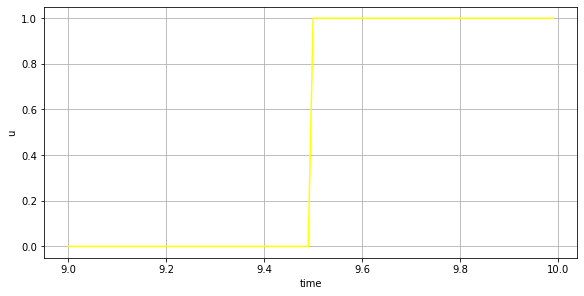

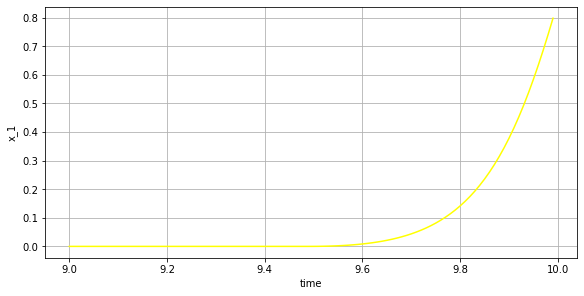

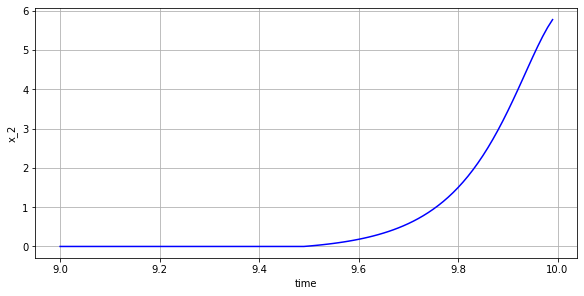

In [356]:
# Degrau
u = np.append(np.zeros((math.floor(len(t)/2), 1)), np.full((math.floor(len(t)/2), 1), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

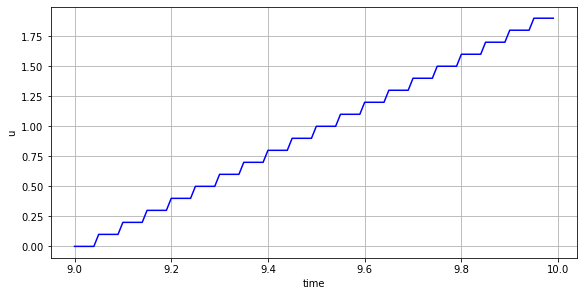

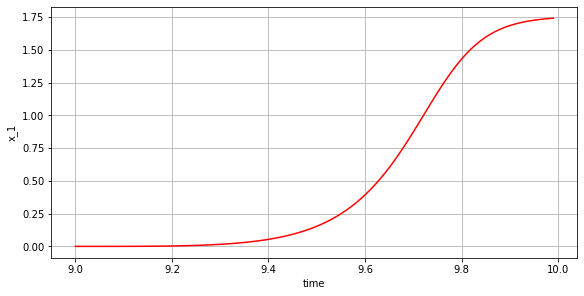

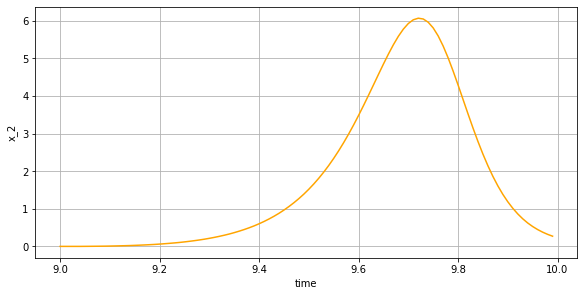

In [357]:
# Sequencia de Degrau
level = np.arange(0, 2, 0.1)
width = math.floor(len(t)/len(level))
ones = np.ones((1,width))
arr = [ level[i] * j  for i in range(len(level)) for j in ones]
u = np.array((arr)).flatten()
run_rk(t.copy() ,x.copy(), u.copy() , h)

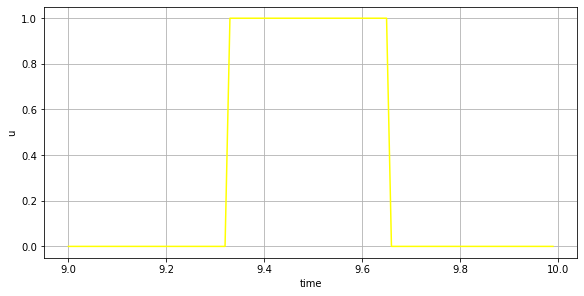

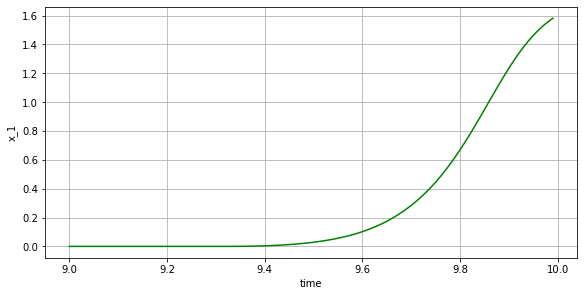

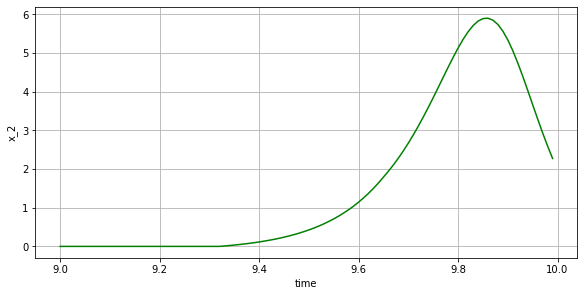

In [358]:
# Pulso
u = np.append(np.append(np.zeros((math.floor(len(t)/3), 1)), np.full((math.floor(len(t)/3), 1), 1)), np.zeros((math.floor(len(t)/3)+1, 1)))
run_rk(t.copy() ,x.copy(), u.copy() , h)

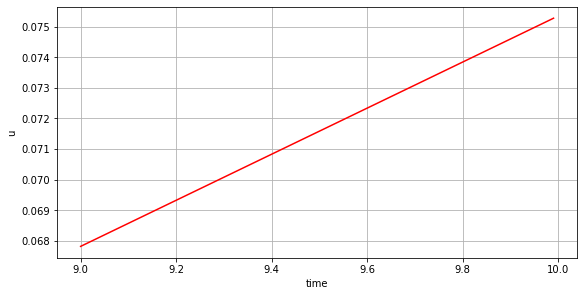

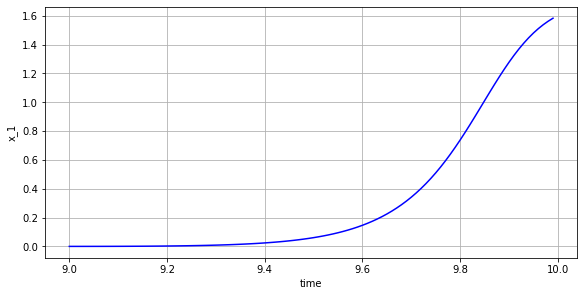

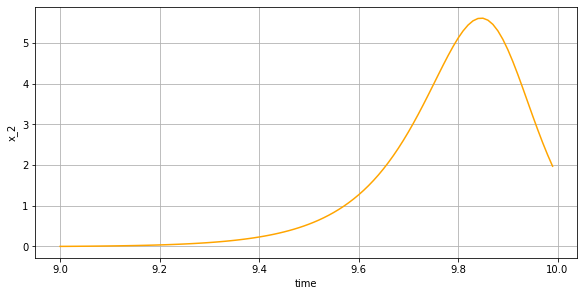

In [359]:
# Crescente
u = np.array([U * math.sin(omega * i * Ts) for i in t])  # np.zeros((len(t), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

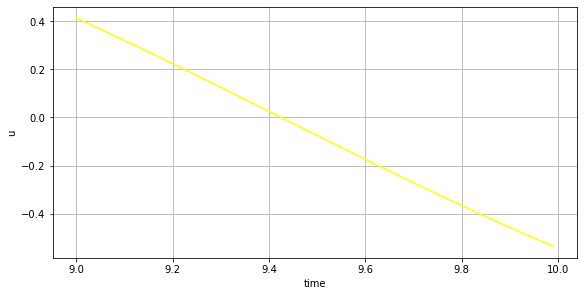

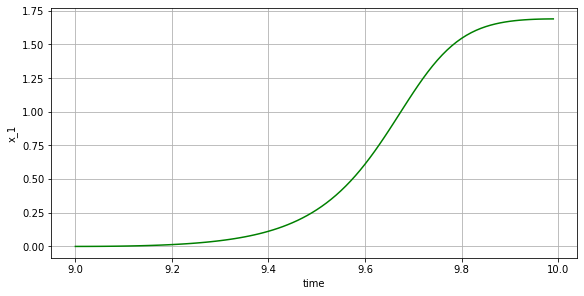

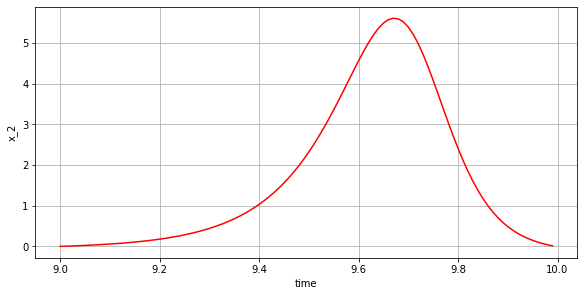

In [360]:
# Senoidal
u = np.sin(np.array(t))  # np.zeros((len(t), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

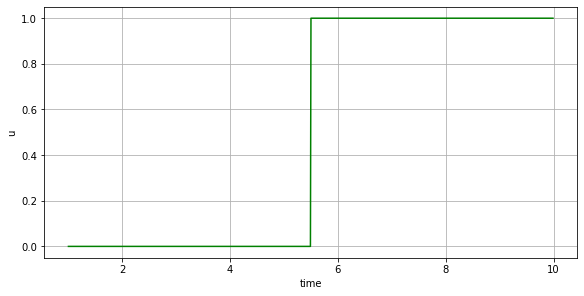

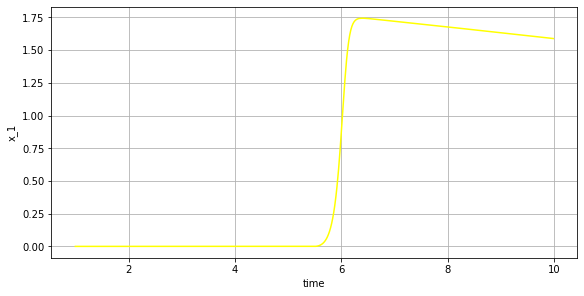

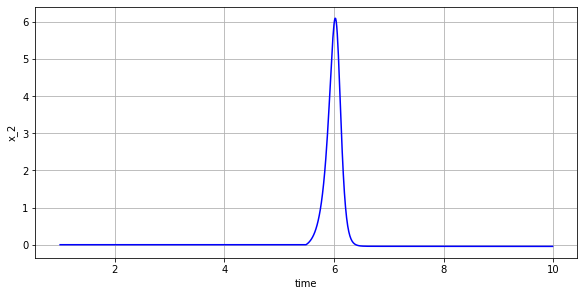

In [361]:
t0 = 1
tf = 10
h = 0.01
t = np.arange(t0, tf, h)

# [print(i) for i in t if i < 0.1]

x0 = np.array([[0], [0]])

z_x = np.zeros((len(x0), len(t) - 1))
x = x0.copy()
x = np.append(x, z_x, axis=1)

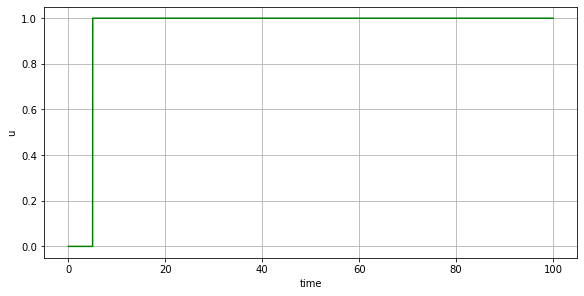

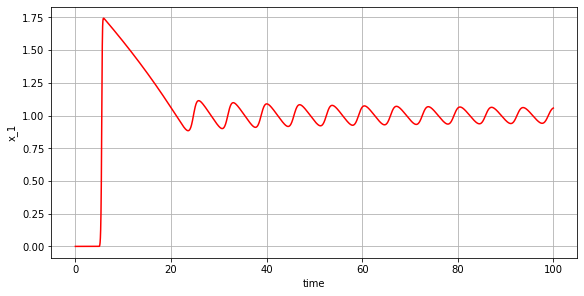

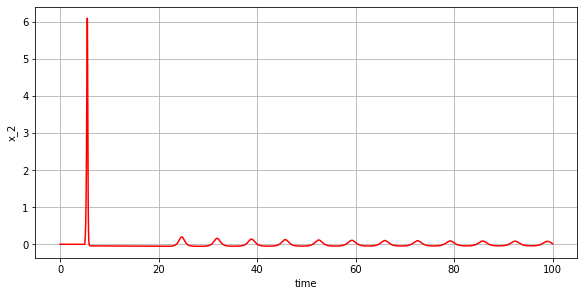

In [374]:
# Degrau
u = np.append(np.zeros((math.floor(len(t)/20), 1)), np.full((math.floor(len(t) - len(t)/20), 1), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

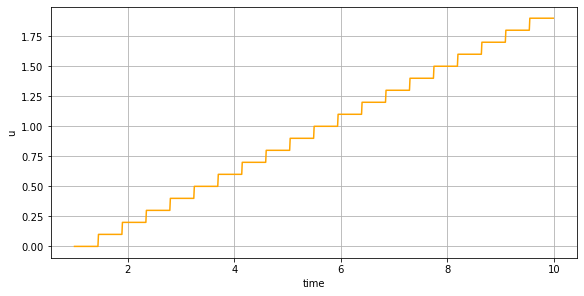

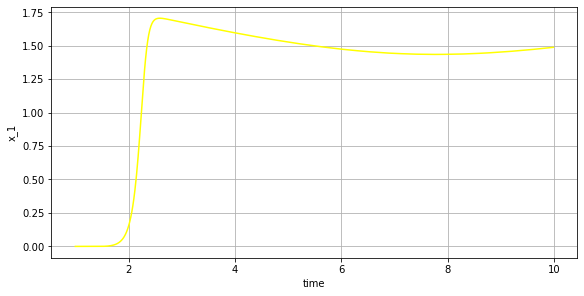

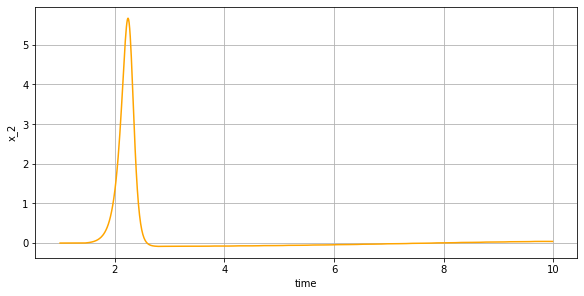

In [362]:
# Sequencia de Degrau
level = np.arange(0, 2, 0.1)
width = math.floor(len(t)/len(level))
ones = np.ones((1,width))
arr = [ level[i] * j  for i in range(len(level)) for j in ones]
u = np.array((arr)).flatten()
run_rk(t.copy() ,x.copy(), u.copy() , h)

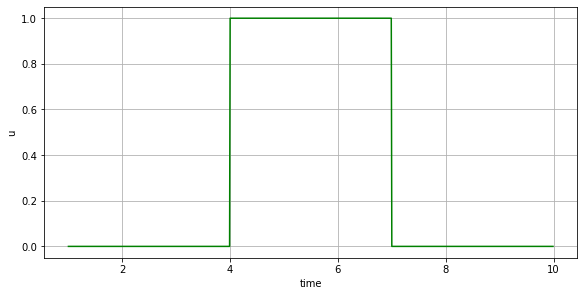

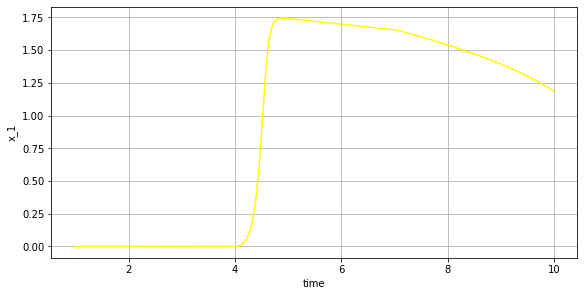

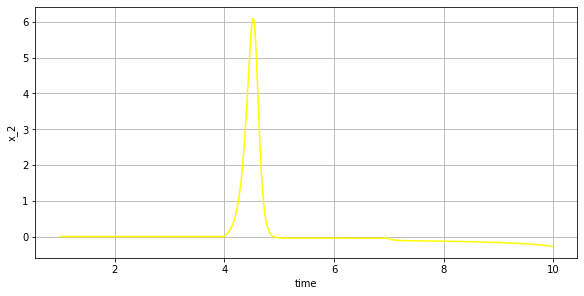

In [363]:
# Pulso
u = np.append(np.append(np.zeros((math.floor(len(t)/3), 1)), np.full((math.floor(len(t)/3), 1), 1)), np.zeros((math.floor(len(t)/3), 1)))
run_rk(t.copy() ,x.copy(), u.copy() , h)

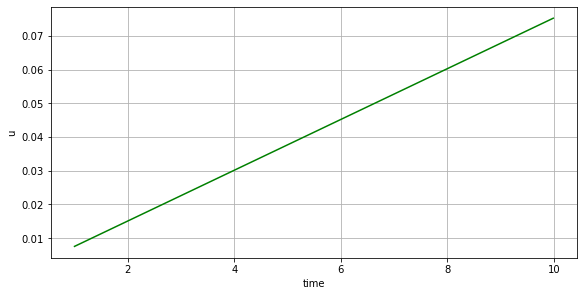

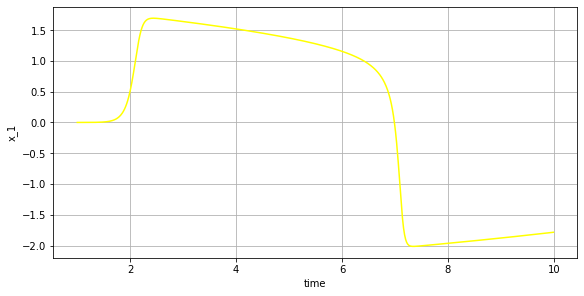

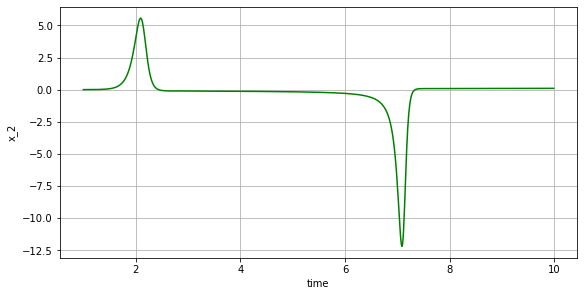

In [364]:
# Crescente
u = np.array([U * math.sin(omega * i * Ts) for i in t])  # np.zeros((len(t), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

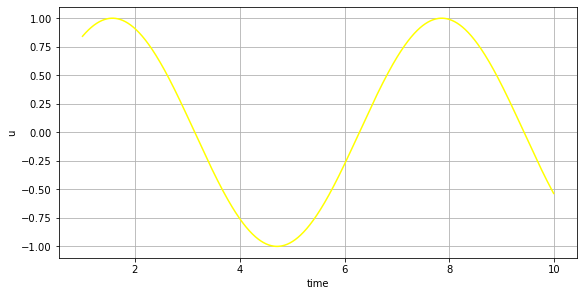

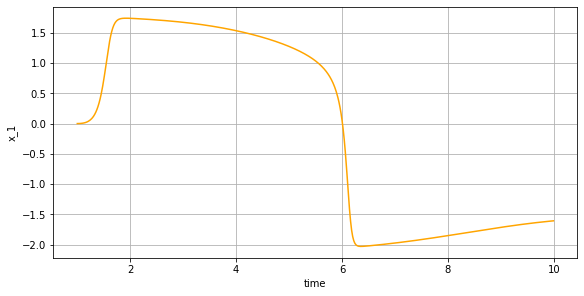

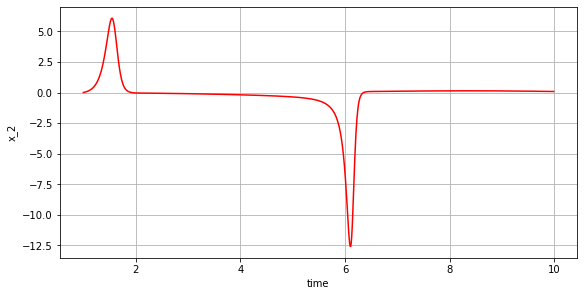

In [365]:
# Senoidal
u = np.sin(np.array(t))  # np.zeros((len(t), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

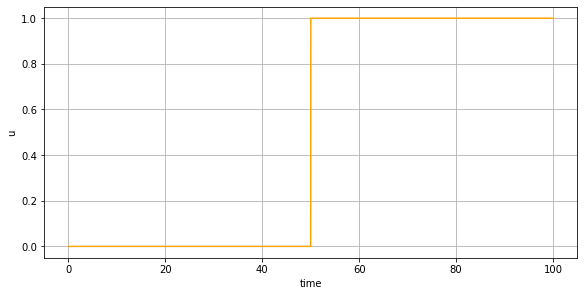

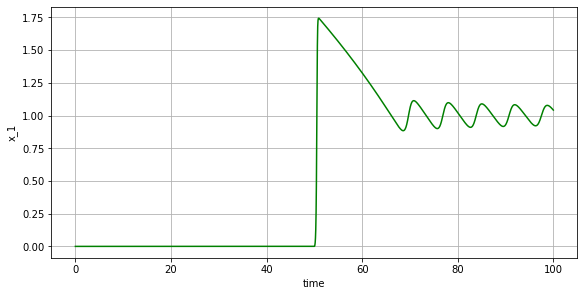

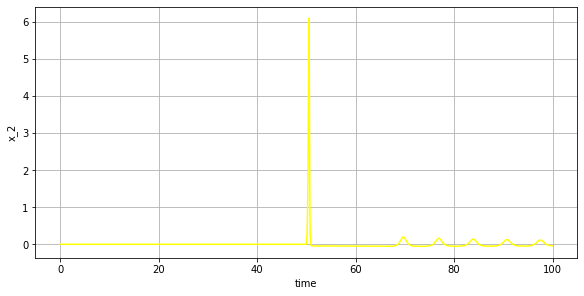

In [366]:
t0 = 0
tf = 100
h = 0.01
t = np.arange(t0, tf, h)

# [print(i) for i in t if i < 0.1]

x0 = np.array([[0], [0]])

z_x = np.zeros((len(x0), len(t) - 1))
x = x0.copy()
x = np.append(x, z_x, axis=1)


# Degrau
u = np.append(np.zeros((math.floor(len(t)/2), 1)), np.full((math.floor(len(t)/2), 1), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

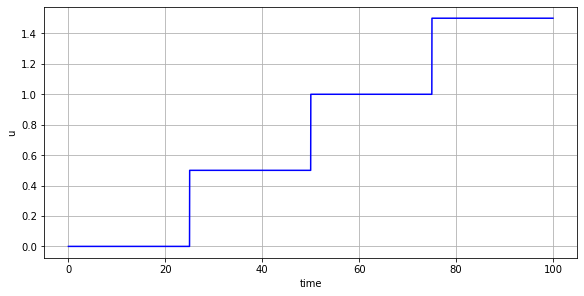

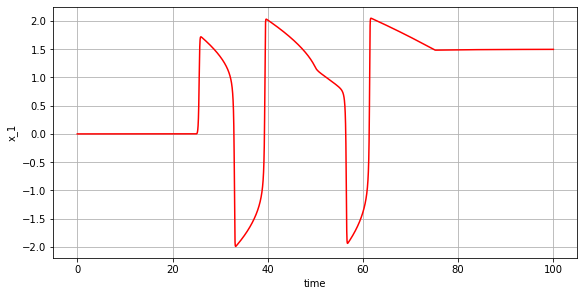

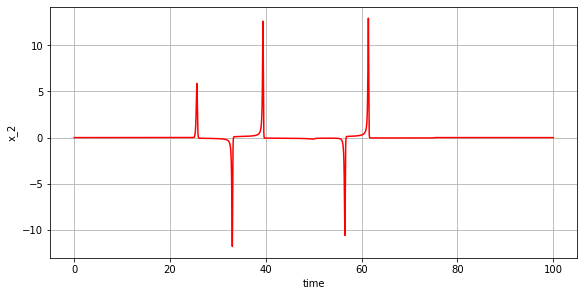

In [372]:
# Sequencia de Degrau
level = np.arange(0, 2, 0.5)
width = math.floor(len(t)/len(level))
ones = np.ones((1,width))
arr = [ level[i] * j  for i in range(len(level)) for j in ones]
u = np.array((arr)).flatten()
run_rk(t.copy() ,x.copy(), u.copy() , h)

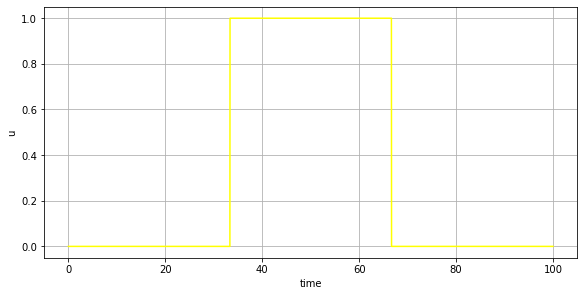

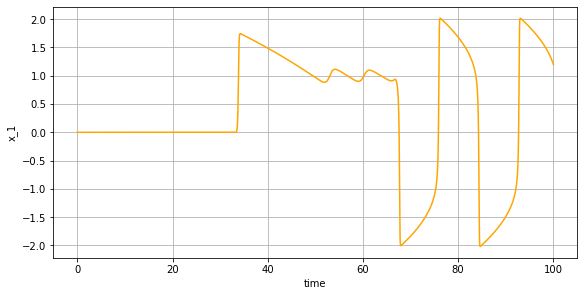

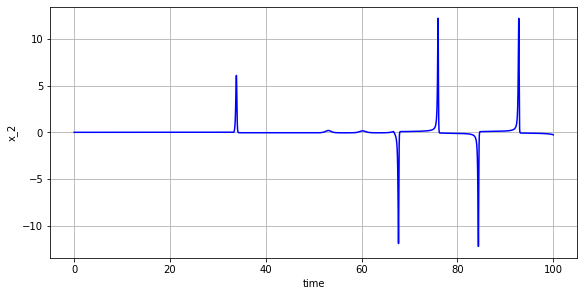

In [369]:
# Pulso
u = np.append(np.append(np.zeros((math.floor(len(t)/3), 1)), np.full((math.floor(len(t)/3), 1), 1)), np.zeros((math.floor(len(t)/3)+1, 1)))
run_rk(t.copy() ,x.copy(), u.copy() , h)

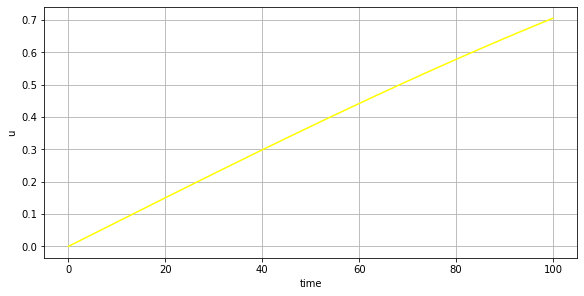

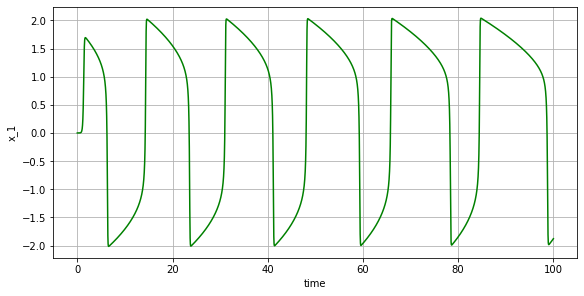

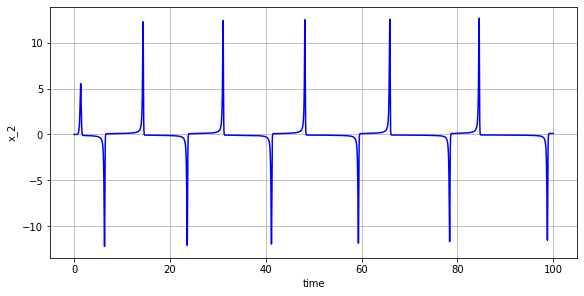

In [370]:
# Crescente
u = np.array([U * math.sin(omega * i * Ts) for i in t])  # np.zeros((len(t), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

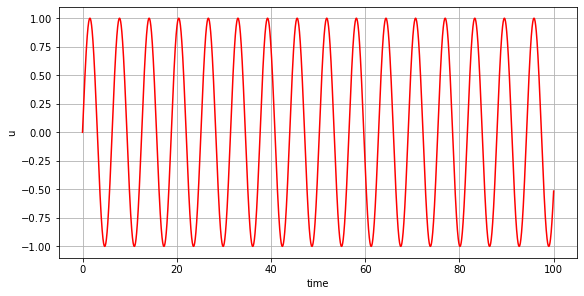

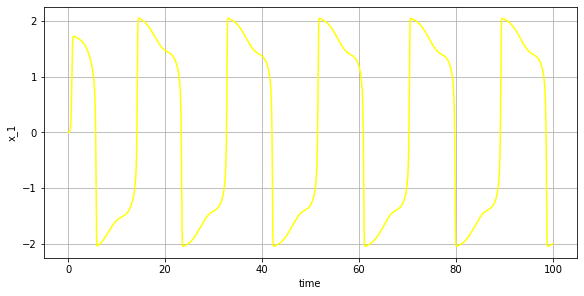

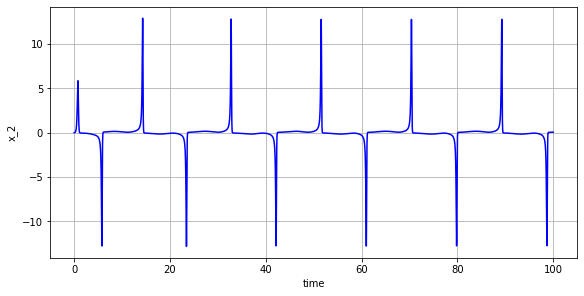

In [371]:
# Senoidal
u = np.sin(np.array(t))  # np.zeros((len(t), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

# Referência
[Teoria de simulação de Van Der Pol](https://hal.archives-ouvertes.fr/hal-00734058/document)
[Teoria do uso de modelo de Van Der Pol](https://www.johndcook.com/blog/2019/12/26/van-der-pol-period/)
[Trabalho prático utilizado para o modelo](https://repository.library.northeastern.edu/files/neu:336724/fulltext.pdf)
[Controle e Sistemas](ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/ea932_03/aulas/topico7_03.pdf)